In [34]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [5]:
path = './Data/'

filename = os.path.join(path, "iris.csv")
df = pd.read_csv(filename, na_values=['NA','?'])
df[0:5]


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)

from sklearn import preprocessing
species = encode_text_index(df, "species")

x,y = to_xy(df, "species")

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(
x,y,test_size = 0.25, random_state=12)

C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [27]:
x_train.shape

(112, 4)

In [37]:
from keras.callbacks import ModelCheckpoint
model = Sequential()
model.add(Dense(10,
                input_dim=x.shape[1],
               activation='relu'))
model.add(Dense(5,
               activation='relu'))
model.add(Dense(y.shape[1],
               activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam')
monitor=EarlyStopping(monitor='val_loss',
                     min_delta=1e-3,
                     patience=5,
                     verbose=1,
                     mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weight.hdf5",
                              verbose=0,
                              save_best_only=True)
model.fit(x,y,validation_data=(x_test,y_test),
         callbacks=[monitor, checkpointer],
         verbose=2,
         epochs=1000)


Train on 150 samples, validate on 38 samples
Epoch 1/1000
 - 1s - loss: 1.7774 - val_loss: 1.5971
Epoch 2/1000
 - 0s - loss: 1.6165 - val_loss: 1.4820
Epoch 3/1000
 - 0s - loss: 1.4730 - val_loss: 1.3963
Epoch 4/1000
 - 0s - loss: 1.3805 - val_loss: 1.3374
Epoch 5/1000
 - 0s - loss: 1.3085 - val_loss: 1.2986
Epoch 6/1000
 - 0s - loss: 1.2638 - val_loss: 1.2701
Epoch 7/1000
 - 0s - loss: 1.2262 - val_loss: 1.2442
Epoch 8/1000
 - 0s - loss: 1.1962 - val_loss: 1.2165
Epoch 9/1000
 - 0s - loss: 1.1699 - val_loss: 1.1878
Epoch 10/1000
 - 0s - loss: 1.1433 - val_loss: 1.1611
Epoch 11/1000
 - 0s - loss: 1.1193 - val_loss: 1.1320
Epoch 12/1000
 - 0s - loss: 1.0951 - val_loss: 1.1043
Epoch 13/1000
 - 0s - loss: 1.0710 - val_loss: 1.0784
Epoch 14/1000
 - 0s - loss: 1.0484 - val_loss: 1.0543
Epoch 15/1000
 - 0s - loss: 1.0272 - val_loss: 1.0303
Epoch 16/1000
 - 0s - loss: 1.0059 - val_loss: 1.0073
Epoch 17/1000
 - 0s - loss: 0.9858 - val_loss: 0.9869
Epoch 18/1000
 - 0s - loss: 0.9666 - val_loss:

Epoch 151/1000
 - 0s - loss: 0.2184 - val_loss: 0.2053
Epoch 152/1000
 - 0s - loss: 0.2173 - val_loss: 0.2028
Epoch 153/1000
 - 0s - loss: 0.2148 - val_loss: 0.2015
Epoch 154/1000
 - 0s - loss: 0.2127 - val_loss: 0.2003
Epoch 155/1000
 - 0s - loss: 0.2101 - val_loss: 0.1977
Epoch 156/1000
 - 0s - loss: 0.2082 - val_loss: 0.1958
Epoch 157/1000
 - 0s - loss: 0.2063 - val_loss: 0.1936
Epoch 158/1000
 - 0s - loss: 0.2043 - val_loss: 0.1919
Epoch 159/1000
 - 0s - loss: 0.2025 - val_loss: 0.1906
Epoch 160/1000
 - 0s - loss: 0.2003 - val_loss: 0.1887
Epoch 161/1000
 - 0s - loss: 0.1988 - val_loss: 0.1868
Epoch 162/1000
 - 0s - loss: 0.1969 - val_loss: 0.1856
Epoch 163/1000
 - 0s - loss: 0.1949 - val_loss: 0.1835
Epoch 164/1000
 - 0s - loss: 0.1932 - val_loss: 0.1816
Epoch 165/1000
 - 0s - loss: 0.1914 - val_loss: 0.1802
Epoch 166/1000
 - 0s - loss: 0.1904 - val_loss: 0.1794
Epoch 167/1000
 - 0s - loss: 0.1882 - val_loss: 0.1771
Epoch 168/1000
 - 0s - loss: 0.1864 - val_loss: 0.1758
Epoch 169/

OSError: Unable to open file (unable to open file: name = 'best_weights.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [42]:
from sklearn import metrics
import tensorflow as tf

model.load_weights('best_weight.hdf5')

pred = model.predict(x_test)
print(pred[0:5])

[[9.9237204e-01 7.6279533e-03 3.5024919e-10]
 [8.4642716e-06 7.6937288e-02 9.2305422e-01]
 [9.8662704e-01 1.3372928e-02 3.9050421e-09]
 [6.1663557e-03 9.4982022e-01 4.4013467e-02]
 [2.9152298e-07 1.8266078e-02 9.8173368e-01]]


In [43]:
# raw probabilities to chosen class

pred = np.argmax(pred, axis=1)
print(pred)

[0 2 0 1 2 2 2 0 2 0 1 0 0 0 1 2 2 1 0 2 0 1 2 1 0 2 1 1 0 0 0 1 2 0 2 0 1
 1]


In [46]:
y_compare = np.argmax(y_test, axis=1)
score = metrics.accuracy_score(y_compare, pred)

print("Accuracy score:{}".format(score))

Accuracy score:0.9736842105263158


In [47]:
# calculate classification log loss

from IPython.display import display

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

pred = model.predict(x_test)

print("Numpy array of predcitions")
print(pred[0]*100)

print("as percent probability")
display(pred[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score:{}".format(score))


Numpy array of predcitions
[99.2372  0.7628  0.    ]
as percent probability


array([[0.9924, 0.0076, 0.    ],
       [0.    , 0.0769, 0.9231],
       [0.9866, 0.0134, 0.    ],
       [0.0062, 0.9498, 0.044 ],
       [0.    , 0.0183, 0.9817]], dtype=float32)

Log loss score:0.09512243177864309


C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


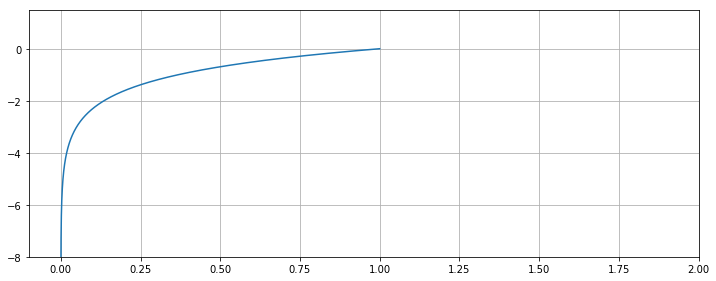

In [49]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi

t = arange(0.0, 1.0, 0.00001)

fig = figure(1,figsize=(12,10))

ax1 = fig.add_subplot(211)
ax1.plot(t, np.log(t))
ax1.grid(True)
ax1.set_ylim((-8,1.5))
ax1.set_xlim((-0.1,2))

show()
